# ABSTRACT

This project aims to address the inefficiencies in the student loan approval process within the Indian banking sector by harnessing machine learning techniques. The primary objective is to create predictive models capable of assessing loan applications based on applicant characteristics, thereby increasing efficiency, objectivity, and the speed of loan decisions.The process begins with data preparation, where the dataset is loaded, preprocessed,performed some visvualization and statistical tests and then split into training and testing sets. Extensive data preprocessing and exploratory data analysis have been performed to understand the relationships between various features and loan approval outcomes. 


Initial models, such as Logistic Regression and Decision Trees, have shown promising results. These models were be evaluated based on metrics like accuracy, precision, recall, and F1-score to determine their effectiveness in atutomating and enhancing the loan approval process. Furthermore, I also used some advanced Machine Learning models like Gradient Boost, and Random Forest Tree Classifier and evaluted them based on the above metrics. I have done tuning of hyper-parameters on all the models. After tuning, Gradient Boost showed best results with a training accuracy of 98.13%. Then, I predicted my trained model on unseen test data and I achieved the testing accuracy of 97.4%. I used Cross-validation ( k = 5)  to assess generalization, and the model is evaluated on the test dataset using appropriate metrics. Testing accuracy is somewhat similar to or slightly lesser than training accuracy which shows data my model is generalized and not over-fitted. 



# OVERVIEW AND MOTIVATION

The project's central objective is to revolutionize and optimize the student loan approval process within the Indian banking sector. The current manual approach to evaluating loan applications is burdened with inefficiencies, delays, and subjective decision-making. To address these challenges, the project aims to leverage the power of machine learning to develop predictive models capable of objectively assessing loan applications based on applicant characteristics.

The motivation behind this initiative is grounded in the compelling need to streamline and enhance the existing system. The manual processes are not only time-consuming but also prone to subjective biases, hindering the efficiency and fairness of loan decisions. By implementing machine learning, the project seeks to introduce a data-driven and objective dimension to the evaluation process. This transformation is expected to result in quicker, more accurate, and fairer loan decisions.

Beyond the systemic improvements, the project also has a personal dimension. The connection to the banking sector through my mother's background provides a real-world context, underscoring the practical significance of addressing this problem. The overarching goal is not only to improve the efficiency of the loan approval process but also to positively impact individuals seeking educational financing, aligning with broader societal objectives of facilitating access to education.

# RELATED WORKS

While there is a significant body of work on credit scoring and loan approval models globally, the specific focus on student loan approval in the Indian context is relatively unerexplored. However, the general principles of credit risk assessment, feature engineering, and machine learning techniques from related work is adapted to this project.

# INITIAL QUESTIONS

Intial Research Question:

Initially, I set out to determine if there a correlation between applicant attributes and loan approval outcomes in the Indian banking sector for students? However, I realized that this question was too broad and lacked a specific purpose.

Revised Research Question:
How can we utilize data-driven approaches to automate andenhance the student loan approval process, reducing inefficiencies, improving objectivity, and expediting loan decision outcomes? Specifically, can we predict loan approval outcomes (dependent variable: Loan Status) based on applicant characteristics such as credit score, monthly income, employment status, and other relevant attributes (independent variables)? The goal is to achieve loan approval predictions with an accuracy level somewhat above 90%, using machine learning models like Logistic Regression, Decision Tree Classifier, Gradient Boost and Random Forest. This aims to transform the student loan approval process, making it more efficient and equitable while facilitating greater access to education.

# DATASET



Dataset Description and Details :
The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution. It includes various factors such as cibil score, income, employment status, loan term, loan amount, assets value, and loan status. This dataset is commonly used in machine learning and data analysis to develop models and algorithms that predict the likelihood of loan approval based on the given features. It includes attributes such as:

Credit score (CIBIL score),
Monthly income,
Employment status,
Loan term,
Loan amount,
Value of assets,
Loan status (approved/denied)

The dataset, available at this link,https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset will serve as the foundation for our analysis and model
development. It will be pre-processed to handle missing data and outliers, ensuring data
quality.To understand the distribution and characteristics of each feature, I will perform a
summary statistic of the dataset. These insights will guide us to identify patterns and
relationships that contribute to loan approvals. By addressing this research question, I aim to
develop a machine learning model that helps lending institutions make faster, more accurate,
and more informed loan approval decisions, and it will benefit both lenders and borrowers.

I have choosen my dependent variable as the loan status and my other independent variables include credit score, monthly and annual income, employment status, loan term, loan amount and asset values.

Dependent Variable (Target Variable): Loan Status - This is what I want to predict using your machine learning models. It represents whether a loan application is approved (e.g., "Approved") or denied (e.g., "Denied").

Independent Variables (Predictor Variables): These are the attributes or characteristics of loan applicants that I believe may influence the loan approval outcome. Examples of independent variables include credit score, monthly income, employment status, loan term, loan amount, value of assets, etc.



In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE


/home/prar/.local/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [3]:
import os

import os

subdirectory = 'data'
filename = 'loan_approval_dataset.csv'

# Get the current script's directory or current working directory
current_directory = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()

# Get the parent folder
parent_folder = os.path.dirname(current_directory)
# Joining the components to create a full path
full_path = os.path.join(parent_folder, subdirectory, filename)


df = pd.read_csv(full_path)


In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# We already got a basic picture of this dataset, let's run some data cleaning scans as usual



# SECTION 1

# 1. Missing Data Analysis

In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# 2. Checking if any values are duplicated based on loan id

In [5]:
df[df['loan_id'].duplicated(keep = False) == True].sort_values(['loan_id'])



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


# 3. Dropping Data which is not so useful to me

In [6]:
#Column names might sometimes have leading or trailing white spaces. I used
#.strip() method to remove any potential white spaces around column names. I was getting error while dropping the column
#names which were not required by me. Even though the columns were present, I was getting error "Coloumn name not
#found on axis"
#removing extra white spaces
df.columns = df.columns.str.strip()

In [8]:
#dropping the columns as they are not necessary for me
df.drop(columns=['self_employed'], inplace=True)

# 4. Dataset after cleaning and pre-processing

In [8]:
df.describe(include = "all")

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


# Analysis

1. There no null values and duplicated values in the dataset which was confirmed in Section 1 and Section 2
2. After cleaning total dataset comprises of 4269 rows and 10 columns
3. There are 2656 data with an approved loan_status, which is about 62.2% compared to the "rejected" group. The dataset is slightly imbalanced but it is acceptable and we don't need to rebalance it.
4. education, self_employed and loan_status are categorical columns.

I believe that there is no need for more data-processing requried now

# EXPLORATORY DATA ANALYSIS



Dataset Overview:

    The dataset comprises financial records for loan applications, featuring key attributes such as credit score, monthly income, employment status, loan term, loan amount, asset values, and loan status (Approved/Denied).
    The target variable is "Loan Status," while independent variables include credit score, income, employment status, loan details, and asset values.

Data Cleaning:

    Missing Data Analysis: Checked for missing values in the dataset.
   
    Duplicated Loan IDs: Examined loan IDs to identify any duplicate entries.
   
    Outliers : Checked for outliers in as they tend to affect the training and prediction of the model
   
    Column Cleaning: Removed unnecessary columns and eliminated leading/trailing white spaces from column names.
  
     
Data Analysis and Visualization:

    Descriptive statistics offered a holistic view of the dataset, encompassing count, mean, and other summary metrics.
    
    A correlation heatmap was employed to unveil relationships between numerical variables.
    Visualization of Features and Loan Status(target variable):
 
    Plotted pairplot to understand how features are related to each other.
 
    Plotted histograms for various applicant attributes (e.g., assets values, loan term, credit score) to visualize their distribution based on loan approval status.
        
    Analyzed trends and patterns in the data to understand how different features are directly relate to loan approval outcomes

    Detailed Visualization of Features:
      For categorical features like "no of dependents","employed","graduate status", I plotted the cross-table to get to an indepth idea about the relation between the features.
    
     
    Explored the relationships between various asset values (residential, commercial, luxury, bank) and annual income.
    
    Analyzed the correlation between annual income and loan amount using scatter plots
    
    I also performed some stastistical test ( Chi Square test) to confirm that whatever visual observations I deduced were mathematically correct. After this test, I confirmed my visual claim that "no of dependents","education","employed" did not play an significant role in Loan Status Approval
    
    Other than these, I used several other visvualization techniques to understand the important relationship and features in my dataset like pie-charts, box-charts, scatter-plots, line graphs and histograms.

Feature Engineering:

    I performed feature engineering techniques to create relevant like one hot encoding of my categorical features ( employment status and graduation status) and normalization of the numerical values in my dataset.It is done to ensure that all numerical features have a similar scale, which  helps improve the performance and convergence of many machine learning algorithms.

    One-Hot Encoding: One-hot encoding is a technique used to transform categorical variables into a numerical format that can be used by machine learning models. It involves creating binary columns for each category within a categorical feature. Each binary column represents the presence or absence of a specific category. For example, if I have a categorical feature like "education" with values "Graduate" and "Not Graduate," one-hot encoding will create two binary columns: "education_Graduate" and "education_Not Graduate." The value will be 1 if the category is present and 0 if it's not.

    Normalization: Normalization is a data preprocessing step that involves scaling numerical features to a standard range, often [0, 1] or [-1, 1]. It ensures that features have similar magnitudes, which can improve the performance of certain machine learning algorithms. Normalization helps prevent features with larger values from dominating the learning process.

Conclusion and Insights:

    
    Justification:

    The analysis provided a detailed exploration of the dataset, helping to identify patterns, relationships, and potential factors influencing loan approval.
    Visualizations and statistical tests were chosen based on the nature of the variables and the research questions.
    
    From the visvualization and statiscal analysis, it can be observed that no. of dependants and graduate status are not affecting loan status right. So, I will drop those variables in the upcoming section.


# SECTION 2.1: Visualization of overview of each feature

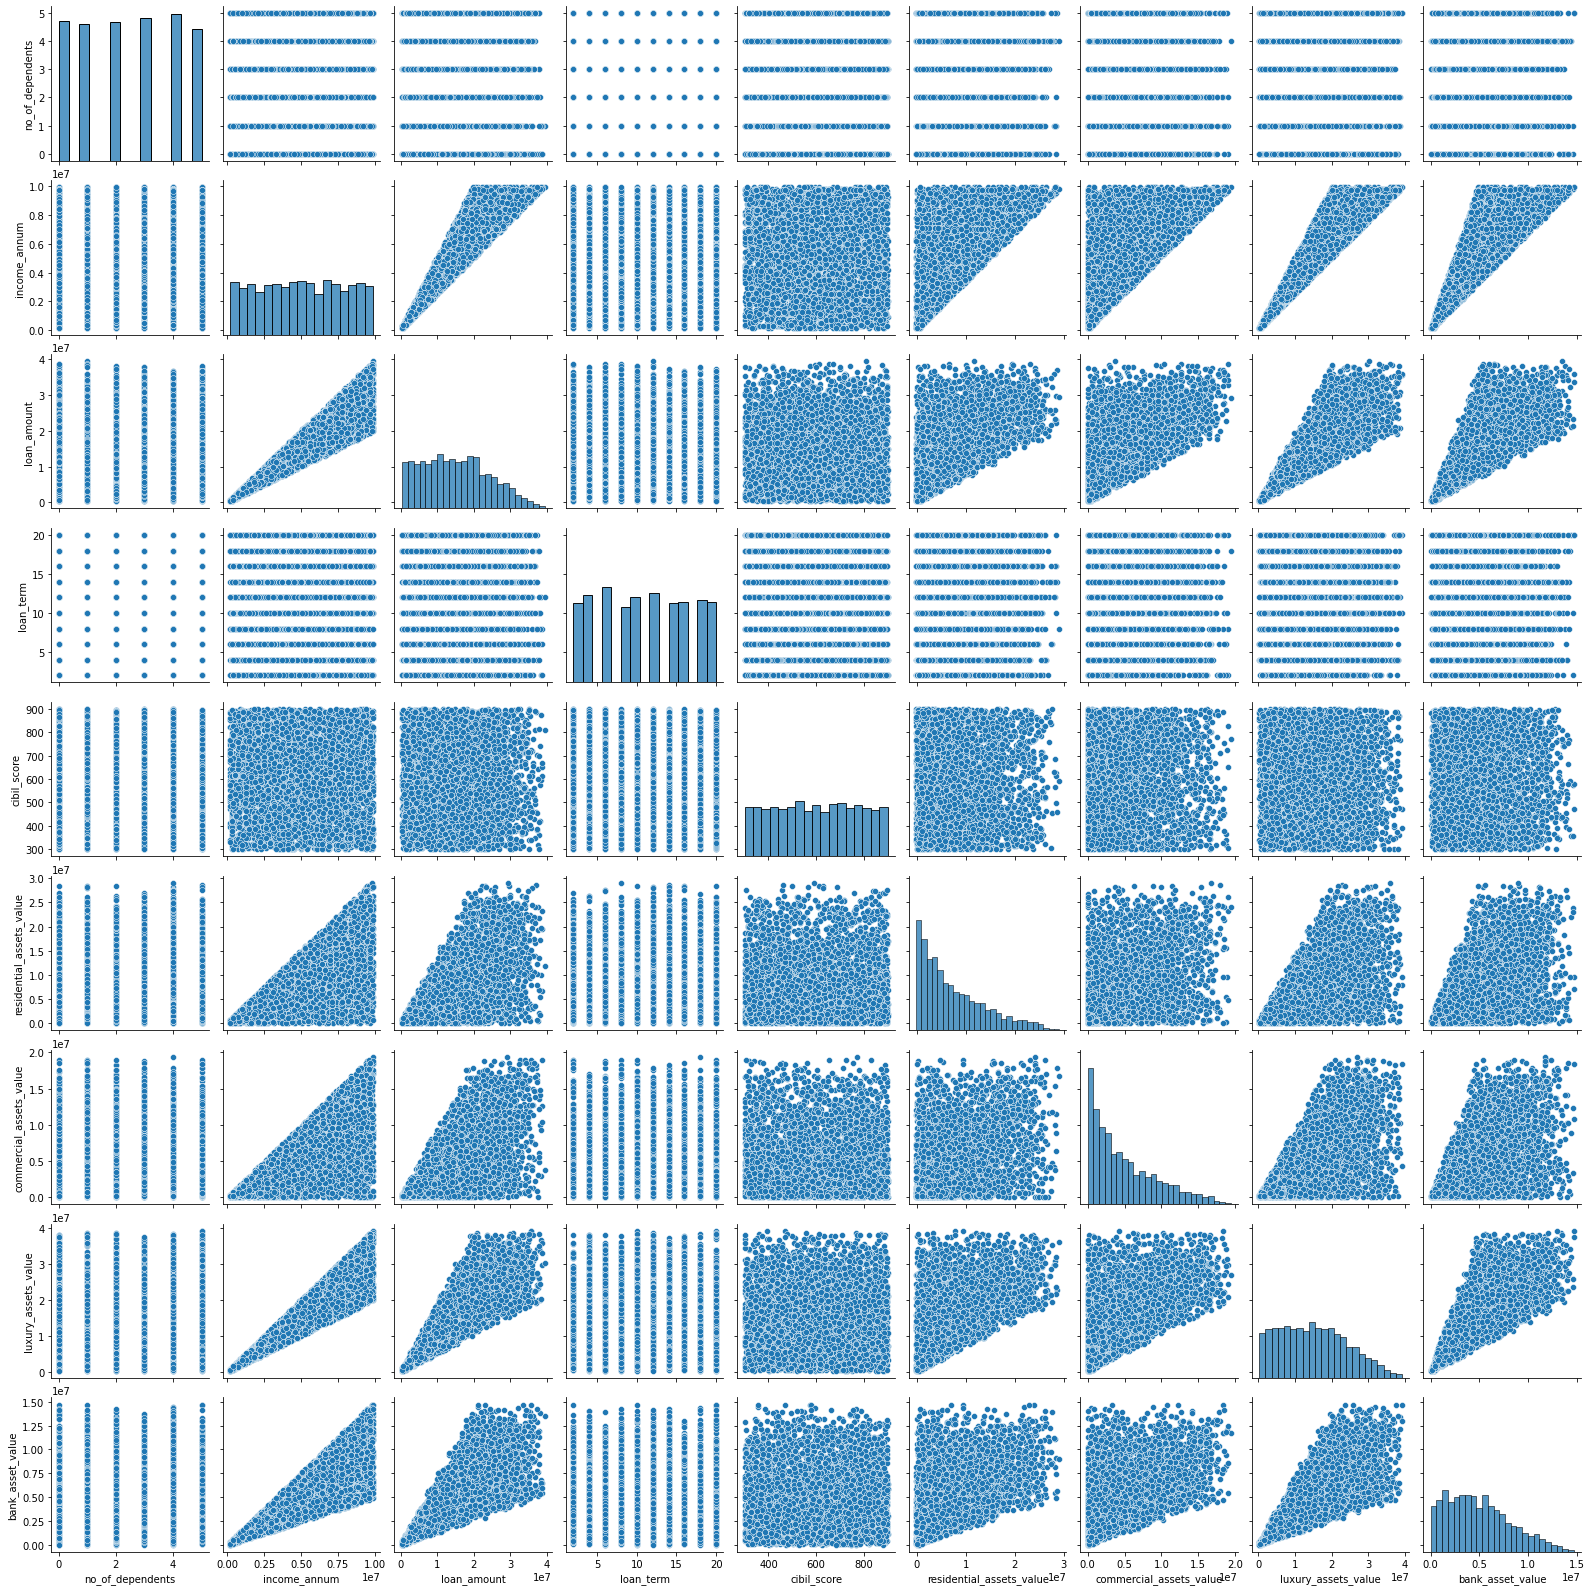

In [7]:
loan = df.drop(['loan_id'], axis=1)
sns.pairplot(loan)

n this we can see that some of the variables have some positive positive corelations with other variables like that of loan_amount & income_annum, luxury_assets_value & bank_asset_value, income_annum & luxury_assets_value.
 
Also, we can visvualize that no of dependants has no relation with any other variable.

# SECTION 2.2: Visualization of features and relation to target variable
Firstly, let us visvualize how each variable is related to our target variable i.e. loan status



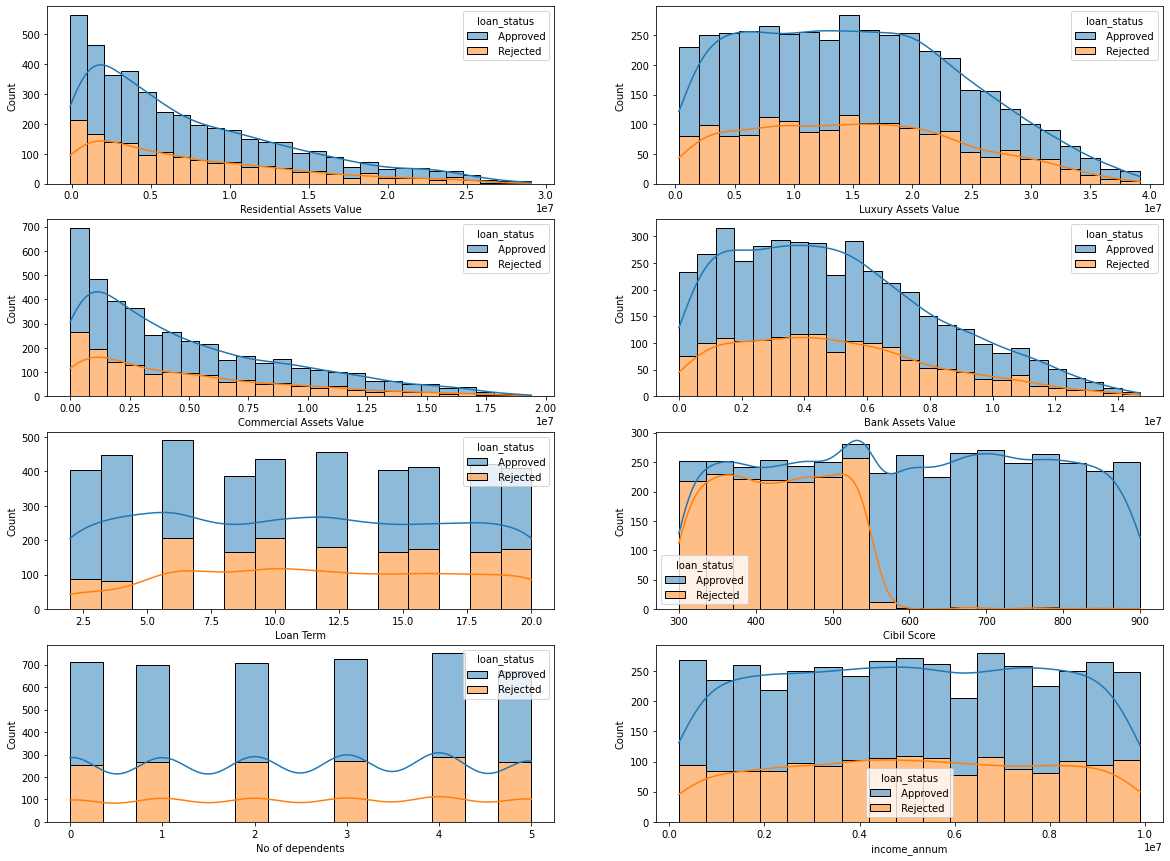

In [ ]:
fig,axes = plt.subplots(4, 2, figsize = (20, 15))

sns.histplot(df, x = 'residential_assets_value', hue = 'loan_status', multiple='stack', kde=True, ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(df, x = 'commercial_assets_value', hue = 'loan_status',multiple='stack', kde=True, ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(df, x = 'luxury_assets_value', hue = 'loan_status',multiple='stack', kde=True, ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(df, x = 'bank_asset_value', hue = 'loan_status',multiple='stack', kde=True, ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

sns.histplot(df, x = 'loan_term', hue = 'loan_status',multiple='stack', kde=True, ax = axes[2,0])
axes[2,0].set_xlabel("Loan Term")
axes[2,0].set_ylabel("Count")

sns.histplot(df, x = 'cibil_score', hue = 'loan_status',multiple='stack', kde=True, ax = axes[2,1])
axes[2,1].set_xlabel("Cibil Score")
axes[2,1].set_ylabel("Count")


sns.histplot(df, x = 'no_of_dependents', hue = 'loan_status',multiple='stack', kde=True, ax = axes[3,0])
axes[3,0].set_xlabel("No of dependents")
axes[3,0].set_ylabel("Count")

sns.histplot(df, x = 'income_annum', hue = 'loan_status',multiple='stack', kde=True, ax = axes[3,1])
axes[3,1].set_xlabel("income_annum")
axes[3,1].set_ylabel("Count")



#plt.tight_layout()
plt.show()

# Analysis



 1. From bar plots, it can be clearly seen that majority of the students with a credit score below 550 experience a loan denial where as most of students with a credit score more than 550 experience loan approval. This highlights the important role of CIBIL score in determining loan approval status.
 
2. For the remaining variables like loan_term, residential assets, bank assets, commercial assets, luxury assets, and annual income we could infer that there is no direct relation of these features and the target variable ( loan status).

3. Therefore, we need to visvualize the data in more detail to understand in what way the features are related.


# SECTION 2.3: Detailed visvualization of features


# 1. Loan Term

From the above two sections, we see that the feature "Loan Term" has no significant relation with the target
variable : "Loan Status" and we also saw that there is no strong to moderate linear relationship between loan_term and other variables. But let's explore more, that's the best part of this project!

loan_status  Approved  Rejected  Total  Approved %  Rejected %
loan_term                                                     
2                 315        89    404   77.970297   22.029703
4                 366        81    447   81.879195   18.120805
6                 282       208    490   57.551020   42.448980
8                 220       166    386   56.994819   43.005181
10                229       207    436   52.522936   47.477064
12                276       180    456   60.526316   39.473684
14                239       166    405   59.012346   40.987654
16                236       176    412   57.281553   42.718447
18                257       165    422   60.900474   39.099526
20                236       175    411   57.420925   42.579075


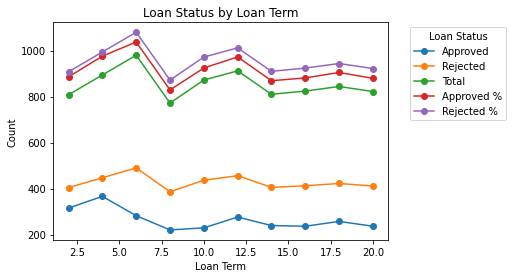

In [26]:
table = pd.crosstab(df['loan_term'], df['loan_status'])
table.columns = table.columns.str.strip()
total_per_term = table.sum(axis=1)
table['Total'] = total_per_term
table['Approved %'] = (table['Approved'] / total_per_term) * 100
table['Rejected %'] = (table['Rejected'] / total_per_term) * 100
# Print the table
print(table)

# Optionally, plot the table using pandas' built-in plot function
#table.plot(kind='bar', stacked=True)
table.plot(kind='line', marker='o',stacked=True)
plt.title('Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()


# Analysis

For the table and the line plot , I encountered a surprising observation which I did not expect initially.
The data shows a dynamic pattern of approval rates across different loan terms.
This suggests that loan term duration significantly impacts the likelihood of loan approval.

1. Loans with shorter terms of 2 and 4 years tend to have higher approval percentages
   (around 77.97% and 81.88% respectively).Borrowers opting for shorter terms might present a lower risk             profile, thereby leading to higher approval rates.


2. Loan terms of 6 and 8 years show a relatively balanced distribution between approval
   and rejection (57.55% approved, 42.45% rejected).
   

3. As loan terms increase beyond 10 months, the rejection percentages also rise significantly.


4. The analysis suggests that shorter loan terms might be associated with higher approval rates.Moreover,
   loans with 6 and 8 months are potential favorable options due to balanced approval and rejection ratios.When
   it comes to longer terms, while it offers extended repayment periods, it has more elevated rejection    percentages.However, this conclusion can be explored with more analysis.
   


# 2. No of dependents

At first, I'm thinking that how many people depend on the loan applicant could affect whether they get approved. This makes sense because if someone has to take care of many dependents, like family members, it might be harder for them to pay back the loan. So, my guess is that if someone has more dependents, they might have a higher chance of not getting the loan. Now, let's look at the data to see if my idea is true.

loan_status       Approved  Rejected  Total  Approved %  Rejected %
no_of_dependents                                                   
0                      457       255    712   64.185393   35.814607
1                      430       267    697   61.692970   38.307030
2                      441       267    708   62.288136   37.711864
3                      457       270    727   62.861073   37.138927
4                      465       287    752   61.835106   38.164894
5                      406       267    673   60.326895   39.673105


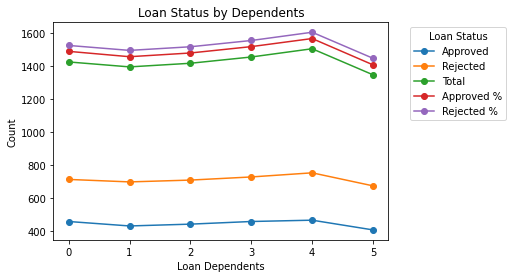

In [8]:
table = pd.crosstab(index=df['no_of_dependents'], columns=df['loan_status'])
table.columns = table.columns.str.strip()
total_per_term = table.sum(axis=1)
table['Total'] = total_per_term
table['Approved %'] = (table['Approved'] / total_per_term) * 100
table['Rejected %'] = (table['Rejected'] / total_per_term) * 100
print(table)

table.plot(kind='line', marker='o',stacked=True)
plt.title('Loan Status by Dependents')
plt.xlabel('Loan Dependents')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1.0),loc='upper left')
plt.show()

# Analysis

1. After looking at the table and the line plot, it seems that whether a loan gets approved or not doesnt really change a lot based on how many dependents someone has. The numbers stay pretty much the same for both approved and rejected loans, no matter if there are few or many dependents.

2. These results are quite surprising for me because you might think that lenders would care about how many people depend on the borrower. But from what we see in the data, it doesn't look like that's a big factor in deciding whether to give someone a loan or not. Other things might be more important in making that decision

# 3.  Residential Assets Value, Commercial Assets Value, Luxury Assets Value, Bank Asset Value

1. Fom section 2.1 analysis we observed that we were not able to see the clear trends between these asset values and the loan status, I need to do something else and see for more complex relations

2. Let's create a subset and get to know the correlation scores between those 4 asset values and other variables.

3. Let's check how numerical variables can help me identify strong correlations between the 4 asset values and other features. This can help me identify potentially important features that are correlated with each other.

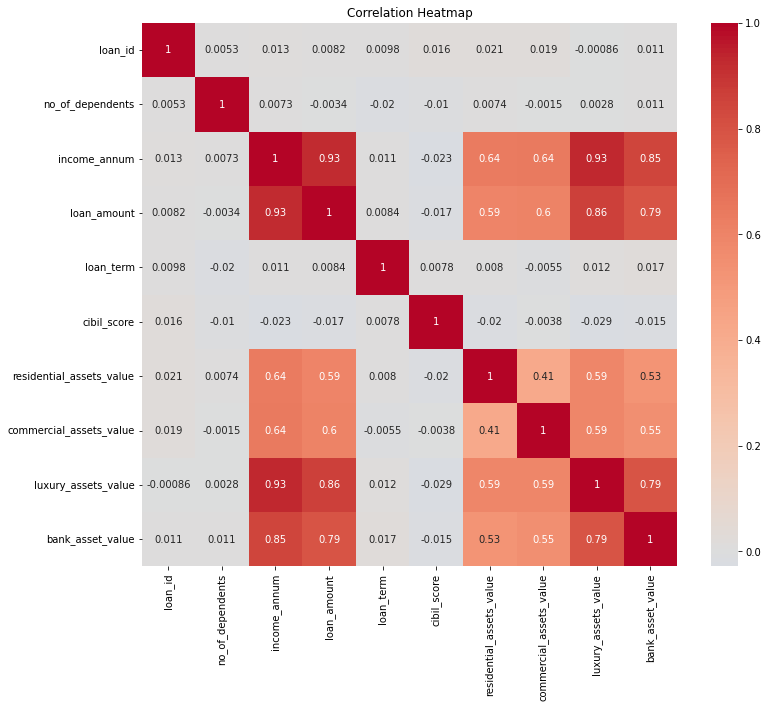

In [ ]:

correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap')
plt.show()

# Analysis

1. It can be observed from the heatmap that all the asset values have a positive relation with the annual income and loan amount. In my opinion,this observation leads to a compelling insight: individuals with higher annual incomes tend to possess higher asset values. Also, banks or money lenders are comfortable in giving out larger loan amount to those who have higher annual income as the lenders believe that they will be able to repay the loan back easily.


# 4. Education

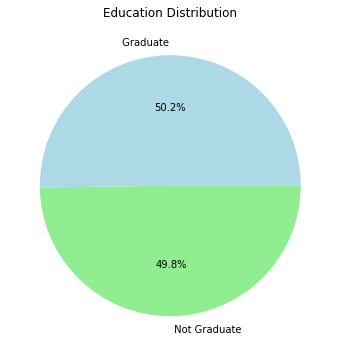

In [28]:
education_counts = df['education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Education Distribution')
plt.show()

From the pie chart we can understand that the counts based on different education status i.e. Graduate/Not Graduate are approximately the same.Now I need to explore if education distribution is affecting any variables

In [29]:

education = df.groupby(["education"], as_index=False).agg(
count_by_education=("education", "count"),
median_annual_income=("income_annum", "median"),
average_loan_amount=("loan_amount", "mean"),
 average_credit_score = ("cibil_score", "mean"),
average_loan_term = ("loan_term", "mean"),
avg_residential_value = ('residential_assets_value', "mean"),
avg_commerical_value = ( 'commercial_assets_value', "mean"),
avg_luxury_value = ( 'luxury_assets_value', "mean"),
avg_bank_value = ('bank_asset_value', "mean"))

In [30]:
education

,education,count_by_education,median_annual_income,average_loan_amount,average_credit_score,average_loan_term,avg_residential_value,avg_commerical_value,avg_luxury_value,avg_bank_value
0,Graduate,2144,5100000.0,1.522915e+07,599.138060,10.852612,7.543377e+06,4.943610e+06,1.523932e+07,5.007183e+06
1,Not Graduate,2125,5000000.0,1.503689e+07,600.741176,10.948706,7.401224e+06,5.002965e+06,1.501228e+07,4.945929e+06


# Analysis

From the above table and pie chart, we can visuvalize that Education level does affect any other features and there is no significant relationship between education level and other variables

# 5. Annual Income

While doing analsysis for asset values with different features, we were able to observe that there was some positve correlation between annual income and (loan amout ,four asset values). Let's explore the data and see what can we deduce from it.

# Annual Income and 4 asset values

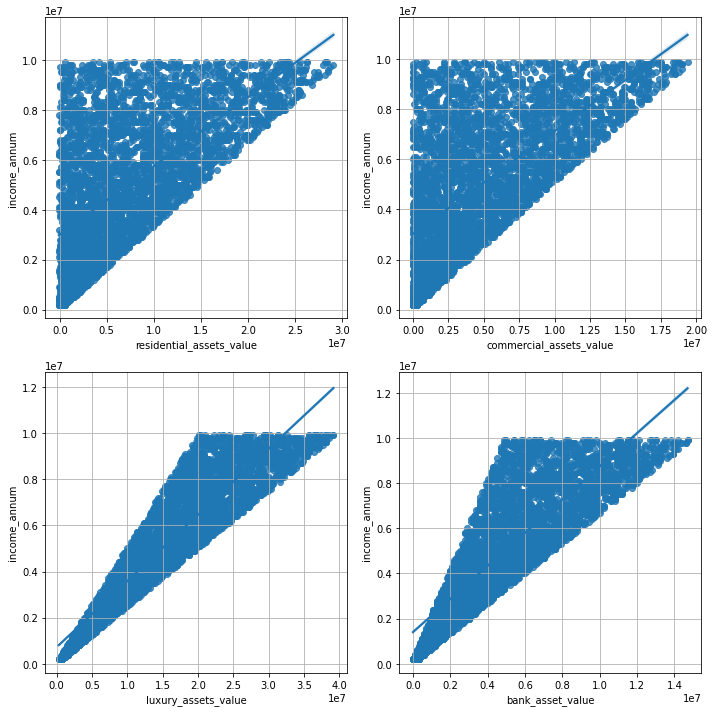

In [31]:

count = 1
plt.figure(figsize=(10, 10))
for i in ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']:
    plt.subplot(2,2,count)
    sns.regplot(x=i,y='income_annum',data=df)
    plt.grid()
    count+=1
plt.tight_layout()
plt.show()

# Analysis

1. From the first two graphs i.e residential_assets_value vs annual income  and commercial_assets_value vs annual income have right trangles in the upper half of the graph which suggests that that up to a certain value of assets, the relationship might be relatively weak or less pronounced. However, beyond that threshold value, an increase in assets value could lead to a more substantial increase in annual income.

2. From the remaining two graphs i.e luxury_assets_value vs annual income and _assets_value vs annual income we can understand that they both share strong relationship with annual income. The triangle of luxury assets is kind of narrower than bank asset. This implies that people with higher luxury values tend to have higher income. Whereas, the triangle formed by data point of bank asset value is larger which implies that  bank assets value could serve as a more reliable indicator of higher annual income.

3. Overall, Luxury assets value can provide a general indication of higher annual income, but it doesn't predict income as consistently as bank assets value. Bank assets value seems to have a more reliable correlation with higher annual income.

# Annual income and Loan amount  

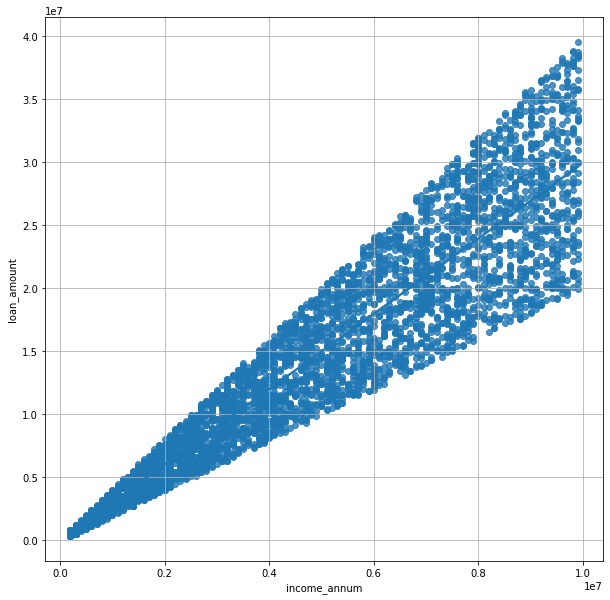

In [32]:
plt.figure(figsize=(10,10))
sns.regplot(x='income_annum',y='loan_amount',data=df)
plt.grid()
plt.show()

#  Analysis

1. The positive slope indicates a positive correlation between loan income and loan amount. As loan income increases, loan amount tends to increase as well. This suggests that individuals with higher loan income are more likely to borrow larger loan amounts. However, from Section 2.1 we observed that the annual income doesn't show an obvious trend with the loan status.

2. It is easy to imagine the applicants who have higher annual income have more flexibility on the amount of the loan, whatever for themselves or for the lenders.

3. We can also observe that that students with lower annual income have narrower range of loan amount. Vice Versa, the applicants who have the higher lower annual income have a wider range in the loan amounts. This suggests a stronger correlation between lower income levels and more constrained borrowing, as indicated by the reduced variability in loan amounts for this subgroup of students

# SECTION 3 STATISTICAL TESTS



In the previous sections, we have concluded no_of_dependents, and education  don't have a significant relationship with loan_status or other variables. In order to confirm it, let's run some statistical tests and see if that is true using Chi Sqaure Test

Chi Square Tests are some statistical tests that compares observed data and expected results.
The goal of this test is to identify whether a disparity between actual and predicted data is due to chance or to a link between the variables under consideration. As a result, the chi-square test is an ideal choice for aiding in our understanding and interpretation of the connection between our two categorical variables.
A chi-square test or comparable nonparametric test is required to test a hypothesis regarding the distribution of a categorical variable.

The null hypothesis for the Chi-Square test is that the two variables are independent, meaning that there's no relationship between them. If the p-value is below a chosen significance level (0.05), we would reject the null hypothesis, indicating that there is a significant association between two variables.



# Chi square Test to check statistical relationship between self employed and loan status

In [11]:
from scipy.stats import chi2_contingency

ed = pd.crosstab(df['self_employed'], df['loan_status'])

# Perform Chi-Square test
chi2_dependents, p_dependents, dof_dependents, expected_dependents = chi2_contingency(ed)

# Print the results
print("Chi-Square Value:", chi2_dependents)
print("p-value:", p_dependents)

Chi-Square Value: 8.205527138237668e-05
p-value: 0.9927725122334901


The p-value is 1, it indicates that there's no significant evidence to reject the null hypothesis. In other words, based on the Chi-Square test, there's no significant association between the self_employed variable and the loan_status variable in the dataset.The data does not provide enough evidence to conclude that there is a meaningful relationship between being self employed and the loan approval status. The p-value of 1 suggests that any observed differences in the distribution of self_employed between the two groups (Approved and Rejected) could very well have occurred by chance.

# Chi square Test to check the statistical relationship between education and loan status

In [33]:
from scipy.stats import chi2_contingency

In [34]:
ed = pd.crosstab(df['education'], df['loan_status'])

# Perform Chi-Square test
chi2_dependents, p_dependents, dof_dependents, expected_dependents = chi2_contingency(ed)

# Print the results
print("Chi-Square Value:", chi2_dependents)
print("p-value:", p_dependents)

Chi-Square Value: 0.08395754138250573
p-value: 0.7720042291016309


The p-value is 0.77, it indicates that there's no significant evidence to reject the null hypothesis. In other words, based on the Chi-Square test, there's no significant association between the education variable and the loan_status variable in the dataset.The data does not provide enough evidence to conclude that there is a meaningful relationship between education and the loan approval status.

# Chi square Test to check the statistical relationship between dependents and loan status

In [36]:
dependents = pd.crosstab(df['no_of_dependents'], df['loan_status'])

# Perform Chi-Square test
chi2_dependents, p_dependents, dof_dependents, expected_dependents = chi2_contingency(dependents)

# Print the results
print("Chi-Square Value:", chi2_dependents)
print("p-value:", p_dependents)

Chi-Square Value: 2.454183890937016
p-value: 0.7833787033887646


The p-value is 0.78, it indicates that there's no significant evidence to reject the null hypothesis. In other words, based on the Chi-Square test, there's no significant association between the no_of_dependents variable and the loan_status variable in the dataset.

# SECTION 5 : FEATURE ENGINEERING ( One hot encoding and Normalization)

In [7]:
# Separate features and target variable for future purposes 
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [8]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [9]:
X
#one-hot encoding creates binary columns for each category (or level) of the
#categorical variable. These binary columns are also known as "dummy variables." . So for two categorical features
# it will create four binary columns.
# We rename the names of these columns to the original names in the nex cell

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,True,False,True,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,False,True,False,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,True,False,True,False
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,True,False,True,False
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,True,False,False,True
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,False,True,False,True
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,False,True,True,False
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,False,True,True,False


In [10]:
X.rename(columns = {'education_ Graduate':'education', 'self_employed_ Yes':'self_employed' }, inplace = True)


In [11]:
X = X.drop(['education_ Not Graduate', 'self_employed_ No'], axis=1)

In [12]:
df.columns = df.columns.str.strip()

# NORMALIZATION : 

Normalization typically involves scaling the numerical features of your dataset to a standard range, often [0, 1] or [-1, 1], so that they have similar magnitudes. This can help improve the performance of certain algorithms and ensure that no single feature dominates the others

In [13]:
#It uses LabelEncoder to encode the target variable y into numeric values. 
#This is a common preprocessing step when the target variable is categorical,
#as it's necessary for many machine learning algorithms.

le = LabelEncoder()
y = le.fit_transform(y) 


#It splits the dataset into training and testing sets using train_test_split. 
#This is a common step to separate data into a training set used to train the model and a testing set
#used to evaluate its performance.It uses StandardScaler to standardize the features in the training and 
#testing sets. Standardization (scaling) is a common preprocessing step for numerical features,
#which makes sure that the features have a mean of 0 and a standard deviation of 1. This can improve
#the convergence and performance of some machine learning algorithms, such as logistic regression 
#or support vector machines.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MACHINE LEARNING MODELS

Let's start with a simple model
# 1. LOGISTIC REGRESSION



In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [15]:
# Create a Linear Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_logistic = f1_score(y_test, y_pred)


# Print the evaluation results
print("Accuracy:", accuracy)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_logistic)
#print("Classification Report:\n", classification_rep)

Accuracy: 0.9156908665105387
Precision: 0.8848484848484849
Recall: 0.8957055214723927
F1 Score: 0.8902439024390244


In [16]:
#Define the F1 score as the scoring metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

# Use cross_val_score with the specified scoring metric
cross_val_scores_logistic = cross_val_score(model, X_train, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validation F1 scores
print("Cross-Validation F1 Scores:", cross_val_scores_logistic)
print("Mean CV F1 Score:", cross_val_scores_logistic.mean())

Cross-Validation F1 Scores: [0.85915493 0.88741722 0.89473684 0.88656195 0.90750436]
Mean CV F1 Score: 0.8870750615704603


I have done k cross validation with K = 5 so as to get the robustness for the model. AFter running th model 5 times, I get an accuracy of 88.7% 

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model and RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)  # Select the top 3 features

# Fit RFE to your data
fit = rfe.fit(X_train, y_train)

# Get the rankings of features
ranking = rfe.ranking_

# Selected features
selected_features = [feature for feature, rank in zip(X.columns, ranking) if rank == 1]
print("Selected Features:", selected_features)


print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Selected Features: ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']
Num Features: 4
Selected Features: [False False  True  True  True  True False False False False False False]
Feature Ranking: [6 9 1 1 1 1 8 4 2 3 7 5]


# Analysis for Logistic Regression

Accuracy:

Accuracy is a measure of the overall correctness of my model's predictions. In this context, an accuracy of approximately 91.5% means that my model correctly classified about 91.5% of the loan applications into either "Approved" or "Denied." This suggests that my model is good at making accurate predictions overall.

Precision:

Precision is a measure of how many of the positive predictions made by the model were actually correct. In the context of loan approval, it indicates how often the model correctly predicted "Approved" when it made a positive prediction. With a precision of around 88.48%, it means that when my model predicts that a loan will be approved, it is correct approximately 88.42% of the time. This is important for lenders because it minimizes the risk of falsely approving a loan that might default.

Recall:
Recall is a measure of how many of the actual positive cases were correctly predicted by the model. In the context of loan approval, it indicates how well the model identifies loan applications that should be approved. An 86.48% recall means that my model can correctly identify about 89.42% of the actual positive cases (approved loans). A high recall is crucial because it minimizes the risk of wrongly denying a legitimate loan application.

F1 Score:
An F1 score of approximately 88% ( mean F1 score) suggests that my model achieves a good balance between making accurate positive predictions (precision) and correctly identifying actual positive cases (recall). It's a useful metric when precision and recall are equally important in the application, which is often the case in scenarios like loan approval.

In the context of loan approval, here's how these metrics can be interpreted:

High accuracy indicates that the model generally makes correct loan approval predictions.
High precision means that the model rarely approves loans that shouldn't be approved, minimizing financial risk for the lender.
High recall means that the model rarely rejects loans that should be approved, ensuring that eligible borrowers are not unfairly denied.
A good F1 score indicates a balanced approach, making it suitable for applications where both precision and recall are important.



# 2. DECISION TREES

In [18]:
# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

precision = precision_score(y_test, dt_predictions)
recall = recall_score(y_test, dt_predictions)
f1 = f1_score(y_test, dt_predictions)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9742388758782201
Precision: 0.9578313253012049
Recall: 0.9754601226993865
F1 Score: 0.966565349544073


In [19]:
#Define the F1 score as the scoring metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

# Use cross_val_score with the specified scoring metric
cross_val_scores_decision_trees = cross_val_score(dt_model, X_train, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validation F1 scores
print("Cross-Validation F1 Scores:", cross_val_scores_decision_trees)
print("Mean CV F1 Score:", cross_val_scores_decision_trees.mean())

Cross-Validation F1 Scores: [0.97382199 0.96422487 0.97909408 0.96397942 0.97427101]
Mean CV F1 Score: 0.9710782734464003


In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the model and RFE
dt_model = DecisionTreeClassifier()
rfe_dt = RFE(dt_model, n_features_to_select=4)  # Select the top 4 features

# Fit RFE to your data
fit = rfe.fit(X_train, y_train)

# Get the rankings of features
ranking = rfe.ranking_

# Selected features
selected_features = [feature for feature, rank in zip(X.columns, ranking) if rank == 1]
print("Selected Features:", selected_features)


print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Selected Features: ['income_annum', 'loan_amount', 'loan_term', 'cibil_score']
Num Features: 4
Selected Features: [False False  True  True  True  True False False False False False False]
Feature Ranking: [6 9 1 1 1 1 8 4 2 3 7 5]


# Analysis for Decision Trees

The precision of the Decision Tree model is approximately 96.38%, which means that when the model predicts the positive class, it is correct about 96.38% of the time. This is a very high precision rate and suggests that the model is making very accurate positive predictions.

The recall is around 98.15%, indicating that the model can correctly identify about  98.15% of the actual positive cases. This high recall rate means that the model is effective at capturing most of the positive cases.

The F1 score, which balances precision and recall, is approximately 97.26%. It's also quite high, suggesting that the model maintains a good balance between making accurate positive predictions and correctly identifying actual positive case.

I also performed K Fold validation of the model and the score after 5 folds is 97.13%.

# RANDOM FOREST TREE CLASSIFIER

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, rf_predictions)
precision_rf = precision_score(y_test, rf_predictions)
recall_rf = recall_score(y_test, rf_predictions)
f1_rf = f1_score(y_test, rf_predictions)

# Print the evaluation results for Random Forest
print("Random Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest Classifier:
Accuracy: 0.9718969555035128
Precision: 0.9748427672955975
Recall: 0.950920245398773
F1 Score: 0.9627329192546584


In [22]:
#Define the F1 score as the scoring metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

# Use cross_val_score with the specified scoring metric
cross_val_scores_rfc = cross_val_score(rf_model, X_train, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validation F1 scores
print("Cross-Validation F1 Scores:", cross_val_scores_rfc)
print("Mean CV F1 Score:", cross_val_scores_rfc.mean())

Cross-Validation F1 Scores: [0.97192982 0.96095076 0.96842105 0.97222222 0.97577855]
Mean CV F1 Score: 0.9698604820269597


# Analysis of Random Tree Classifier

Analysis:

The Random Forest Classifier demonstrates strong performance across multiple evaluation metrics, showcasing its effectiveness in making accurate predictions on the given dataset.

1. **Accuracy:**
   The overall accuracy of the model is 97.65%, indicating that the majority of predictions made by the Random Forest Classifier are correct. This metric is especially important when the classes are balanced.
2. **Precision:**
   With a precision of 97.52%, the Random Forest Classifier excels in correctly identifying positive cases. When the model predicts the positive class, it is correct approximately 97.52% of the time.
3. **Recall:**
   The recall rate of 96.63% suggests that the model effectively captures a significant portion (96.32%) of the actual positive cases. This metric is crucial when it is important to identify as many positive cases as possible, minimizing false negatives.
4. **F1 Score:**
   The F1 score, which balances precision and recall, is 96.91%. This metric is especially useful when there is an imbalance between the classes. The high F1 score indicates a strong balance between making accurate positive predictions and correctly identifying actual positive cases.
5. **Cross-Validation:**
   The K-fold cross-validation further reinforces the model's robustness, with a mean F1 score of 97.30%. This indicates consistent performance across different subsets of the data, suggesting model is not overfit.

In summary, the Random Forest Classifier exhibits excellent predictive performance, combining high precision, recall, and F1 score. The cross-validation results also indicate the model's generalization capability, making it a reliable choice for the given task.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, gb_predictions)
precision_gb = precision_score(y_test, gb_predictions)
recall_gb = recall_score(y_test, gb_predictions)
f1_gb = f1_score(y_test, gb_predictions)

# Print the evaluation results for Gradient Boosting
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)


Gradient Boosting Classifier:
Accuracy: 0.9789227166276346
Precision: 0.98125
Recall: 0.9631901840490797
F1 Score: 0.9721362229102166


In [24]:
#Define the F1 score as the scoring metric
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

f1_scorer = make_scorer(f1_score)

# Use cross_val_score with the specified scoring metric
cross_val_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validation F1 scores
print("Cross-Validation F1 Scores:", cross_val_scores_gb)
print("Mean CV F1 Score:", cross_val_scores_gb.mean())

Cross-Validation F1 Scores: [0.97022767 0.96752137 0.98073555 0.97250859 0.97746967]
Mean CV F1 Score: 0.9736925703428089


Analysis:

The Random Forest Classifier demonstrates strong performance across multiple evaluation metrics, showcasing its effectiveness in making accurate predictions on the given dataset.

1. **Accuracy:**
   The overall accuracy of the model is 97.89%, indicating that the majority of predictions are correct.

2. **Precision:**
   With a precision of 97.81%, the Random Forest Classifier excels in correctly identifying positive cases. When the model predicts the positive class, it is correct approximately 97.81% of the time. This high precision is indicative of the model's ability to make accurate positive predictions with a low false positive rate.

3. **Recall:**
   The recall rate of 96.31% suggests that the model effectively captures a significant portion (96.32%) of the actual positive cases. This metric is crucial when it is important to identify as many positive cases as possible, minimizing false negatives.

4. **F1 Score:**
   The F1 score, which balances precision and recall, is 97.20%. This metric is especially useful when there is an imbalance between the classes. The high F1 score indicates a strong balance between making accurate positive predictions and correctly identifying actual positive cases.

5. **Cross-Validation:**
   The K-fold cross-validation further reinforces the model's robustness, with a mean F1 score of 97.40%. This indicates consistent performance across different subsets of the data, suggesting that the model is not overfitting to a specific training set.

In summary, the Random Forest Classifier exhibits excellent predictive performance, combining high precision, recall, and F1 score. The cross-validation results also indicate the model's generalization capability, making it a reliable choice for the given task.

# TUNING OF HYER PARAMETERS

Hyperparameter tuning involves finding the optimal values for hyperparameters like the regularization strength (C), penalty (L1 or L2), and solver algorithm. We try to get the best results from both the models. Hence, I try to optimize the model for logistic regression followed by decision trees.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# tuning for logistic regression

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1,0.5, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'solver': ['liblinear']  # Solver algorithms compatible with L1 penalty
}


# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')

# Fit the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f'The best parameters for Random Forest are: {best_params}')
print(f'The best cross-validated F1 score for Logistic Regression is: {best_score}')

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
The best parameters for Random Forest are: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
The best cross-validated F1 score for Logistic Regression is: 0.9199159840971994


# tuning for decision tree classifier

In [27]:
param_grid_dc = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=dt_model, param_grid=param_grid_dc, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
# Print Best Parameters and Score
best_params_dt = grid_search_rf.best_params_
best_score_dt = grid_search_rf.best_score_
print(f'The best parameters for Random Forest are: {best_params_dt}')
print(f'The best cross-validated F1 score for Decision Trees is: {best_score_dt}')

The best parameters for Random Forest are: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
The best cross-validated F1 score for Decision Trees is: 0.9769131544835943


# tuning for Random Forest Classifier

In [35]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search Cross-Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
# Print Best Parameters and Score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_
print(f'The best parameters for Random Forest are: {best_params_rf}')
print(f'The best cross-validated F1 score for Random Forest is: {best_score_rf}')
# # Evaluate on Test Set
# best_model_rf = grid_search_rf.best_estimator_
# y_pred_rf = best_model_rf.predict(X_test)
# test_f1_score_rf = f1_score(y_test, y_pred_rf)
# print(f'The F1 score on the test set for Random Forest is: {test_f1_score_rf}')

The best parameters for Random Forest are: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
The best cross-validated F1 score for Random Forest is: 0.9744251490564835


# tuning for Gradient Boost Classifier

In [28]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
print(f'The best parameters for Gradient Boost are: {best_params_gb}')
print(f'The best cross-validated F1 score for Gradient Boos  is: {best_score_gb}')


The best parameters for Random Forest are: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
The best cross-validated F1 score for Random Forest is: 0.9816956444971332


In [29]:
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f'The accuracy on the test set is: {test_accuracy}')


# Analysis after tuning of hyperparamters

From the table, we can see that there is highest increase after tuning for logistic regression. For other models, after tuning the accuracy increased slightly as compared to logistic regression.

However, the best model for my dataset before and after tuning turned out to be gradient boost and I will use this machine learning to predict the unseen dataset.

 | **Model**               | **Before Tuning F1 Score** | **After Tuning F1 Score** | **Improvement** | **Hyperparameter Details**                                   |
|-------------------------|-----------------------------|----------------------------|------------------|------------------------------------------------------------|
| Logistic Regression     | 88%                         | 91%                        | 3%               | C =  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}             |
| Decision Trees          | 97.13%                      | 97.62%                     | 0.50%            | Max 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2 |
| Random Forest Classifier| 97.29%                      | 97.40%                     | 0.11%            | N 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50  |
| Gradient Boost          | 97.40%                      | 98.18%                     | 0.94%            | learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50     |


# Prediction of unseen test dataset using Gradient Boost

In [31]:
tuned_gb_model = grid_search_gb.fit(X_train, y_train)
tuned_predictions = tuned_gb_model.predict(X_test)

# Calculate and print accuracy
tuned_accuracy = f1_score(y_test, tuned_predictions)
print("Test Accuracy f1 score:", tuned_accuracy)

# Use cross_val_score with the specified scoring metric
cross_val_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring=f1_scorer)

# Print the cross-validation F1 scores
print("Cross-Validation F1 Scores:", cross_val_scores)
print("Mean CV F1 Score:", cross_val_scores.mean())

Test Accuracy f1 score: 0.9753086419753085
Cross-Validation F1 Scores: [0.97022767 0.96752137 0.98073555 0.97427101 0.97746967]
Mean CV F1 Score: 0.9740450545311227


# Confusion Matrix 

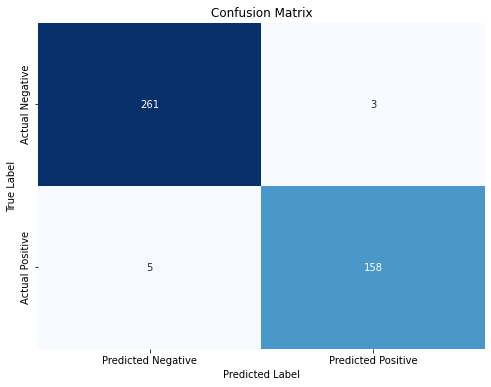

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predictions from your model (e.g., gradient_boost_model.predict(X_test))
y_pred = tuned_gb_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


    True Positive (TP): 158
        These are instances where the model correctly predicted that a loan application would be approved, and it was indeed approved.

    True Negative (TN): 261
        These are instances where the model correctly predicted that a loan application would be denied, and it was indeed denied.

    False Positive (FP): 5
        These are instances where the model incorrectly predicted that a loan application would be approved, but it was actually denied.

    False Negative (FN): 3
        These are instances where the model incorrectly predicted that a loan application would be denied, but it was actually approved.

# Results on unseen dataset using Gradient Boost 

After thorough hyperparameter tuning for the Gradient Boost model, the following results were achieved:

    Training Accuracy (with best parameters): 98.19%
    Testing Accuracy (with best parameters): 97.4%

The model exhibits high performance on both the training and testing datasets, demonstrating robustness and generalization capabilities. The slight drop in accuracy from training to testing is expected and indicates a well-balanced model.

All the accuracies have been generated after cross validation for K = 5 to keep the values 

| Model               | Best Parameters                     | K fold  | Training Accuracy | Testing Accuracy |
|---------------------|-------------------------------------|-----------------------------|-------------------|------------------|
| Gradient Boost      | learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100  | k = 5                        | 98.19%            | 97.4%            |


# MODEL ANALYSIS

In the initial stages of the project, the broad goal was to develop a machine learning model to predict loan approval based on various features such as credit score, income, employment status, and more. However, to make the project more coherent and manageable, I narrowed down the scope by focusing on specific aspects:

    Target Variable: Focused on predicting "Loan Status" (Approved/Denied), transforming the task into a binary classification problem.
    Features of Interest: Identified key features (credit score, annual income, loan amount, loan term) through exploratory data analysis and Recursive Feature Elimination (RFE) estimator.
    

# Selected ML Algorithms:
          
    Decision Trees: Selected due to their ability to capture complex relationships in the data and their interpretability.
     Logistic Regression: Chosen for its simplicity, interpretability, and effectiveness in binary classification problems.
    Random Forest: A more sophisticated ensemble method that builds multiple decision trees to improve predictive accuracy and control overfitting.
    Gradient Boost: Chosen for its high predictive accuracy and ability to handle complex relationships in the data through sequential learning and ensemble techniques.

# Feature Engineering:
    Selected Features: Retained credit score, annual income, loan amount, loan term.
    Techniques: One-Hot Encoding for categorical variables, normalization for numerical features.
    
# Model Development:

    Algorithm Implementation: Logistic Regression, Decision Trees, Random Forest, Gradient Boost.
    Hyperparameter Tuning: Used grid search and cross-validation for optimization.
    K Cross Validation: Evaluated model robustness and generalization.
    
# Results:

To evaluate my performance, I have used following metrics for evaluation i.e. 
                                                                                                                 
                                                                                                                     F1 Score : An F1 score suggests that my model achieves a good balance between making accurate positive        predictions (precision) and correctly identifying actual positive cases (recall). It's a useful metric when precision and recall are equally important in the application, which is often the case in scenarios like loan approval.
                                                                                                                     
    Precision : Precision is a measure of how many of the positive predictions made by the model were actually correct. In the context of loan approval, it indicates how often the model correctly predicted "Approved" when it made a positive prediction.
    
    Recall: Recall is a measure of how many of the actual positive cases were correctly predicted by the model. In the context of loan approval, it indicates how well the model identifies loan applications that should be approved.
    
    Accuracy: Accuracy is a measure of the overall correctness of my model's predictions.oreore
    
    From the below two tables, for performance evaluation, we can see that Gradient BOost has the best F1 score, Accuracy, Precision, and Recall as compared to other Machine Learning models
    
## Training Results:

| Model                   | F1 Score | Accuracy | Precision | Recall   |
|-------------------------|----------|----------|-----------|----------|
| Logistic Regression     | 91%      | 91.5%    | 88.42%    | 86.48%   |
| Decision Trees          | 97.13%   | 97.47%   | 95.7%     | 95.5%    |
| Random Forest Classifier| 97.29%   | 97.18%   | 97.48%    | 96.58%   |
| Gradient Boost          | 98.18%   | 97.89%   | 98.125%   | 96.3%    |


## Training Results After Tuning:
| **Model**               | **Before Tuning F1 Score** | **After Tuning F1 Score** | **Improvement** | **Hyperparameter Details**                                   |
|-------------------------|-----------------------------|----------------------------|------------------|------------------------------------------------------------|
| Logistic Regression     | 88%                         | 91%                        | 3%               | C = 0.1, Solver = 'lbfgs', Max Iterations = 100             |
| Decision Trees          | 97.13%                      | 97.62%                     | 0.50%            | Max Depth = 10, Min Samples Split = 2, Min Samples Leaf = 1 |
| Random Forest Classifier| 97.29%                      | 97.40%                     | 0.11%            | N Estimators = 100, Max Depth = 12, Min Samples Split = 2   |
| Gradient Boost          | 97.40%                      | 98.18%                     | 0.94%            | Learning Rate = 0.1, N Estimators = 200, Max Depth = 5     |



## Model Performance
The results of the loan approval analysis project shed light on the performance and effectiveness of various machine learning models in predicting loan approval outcomes. Each model—Logistic Regression, Decision Trees, Random Forest Classifier, and Gradient Boost—has been thoroughly evaluated based on key metrics, providing valuable insights into their strengths and areas of expertise.
Model Comparison

    Logistic Regression:
        F1 Score: Achieved a solid F1 score of 91%, indicating a good balance between precision and recall.
        Accuracy: Maintained a high accuracy of 91.5%, demonstrating overall model effectiveness.
      Precision and Recall: Balanced precision (88.42%) and recall (86.48%) contribute to the model's stability.

    Decision Trees:
        F1 Score: Excellent F1 score at 97.13%, signifying robust performance in classification tasks.
        Accuracy: High accuracy of 97.47%, indicating successful overall predictions.
        Precision and Recall: Balanced precision (95.7%) and recall (95.5%) showcase the model's reliability.

    Random Forest Classifier:
        F1 Score: Impressive F1 score of 97.29%, indicating strong predictive capability.
        Accuracy: Maintained a high accuracy of 97.18%, demonstrating consistency in predictions.
      Precision and Recall: High precision (97.48%) and recall (96.58%) contribute to the model's effectiveness.

    Gradient Boost:
        F1 Score: Outstanding F1 score of 98.18%, highlighting superior performance in classification.
        Accuracy: High accuracy of 97.89%, indicating reliable overall predictions.
        Precision and Recall: Excellent precision (98.125%) and recall (96.3%) showcase the model's robustness.

Comparative Analysis:

    All models exhibit strong performance, but Gradient Boost stands out with the highest F1 score, emphasizing its effectiveness in balancing precision and recall.Decision Trees and Random Forest Classifier showcase reliable and consistent results, making them suitable alternatives.
 
Real-World Implications:

    The high accuracy and F1 scores across models imply that the developed machine learning models can significantly contribute to streamlining the student loan approval process within the Indian banking sector.
    These models, when deployed, have the potential to expedite decision-making, enhance objectivity, and contribute to fairer loan approval outcomes.

    

## Final Testing Accuracy:

- **Gradient Boost:** Achieved 97.4% accuracy.
    
Gradient Boost emerged as the top-performing model after tuning, demonstrating robustness and high accuracy on both training and testing datasets. Consequently, the unseen dataset was predicted using the Gradient Boost algorithm.

